In [59]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [60]:
pwd

'C:\\Users\\somas\\Downloads\\Uber_Assignment'

In [62]:
Uber=pd.read_csv("Uber Request Data.csv")
Uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [63]:
#Uber.head()
#Uber.info()
Uber.shape

(6745, 6)

In [64]:
#Clean the data
#make the date and time in correct format
Uber["Request timestamp"]=pd.to_datetime(Uber["Request timestamp"])
Uber["Drop timestamp"]=pd.to_datetime(Uber["Drop timestamp"])

In [65]:
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [66]:
#Unique
Uber["Pickup point"].unique()

array(['Airport', 'City'], dtype=object)

In [67]:
#Finding Duplicate values
len(Uber[Uber.duplicated()].index)

0

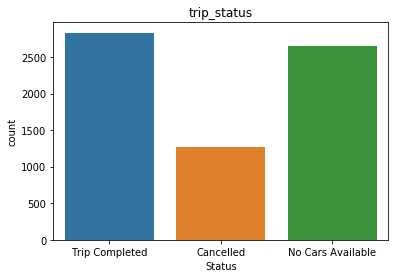

In [68]:
plt.title('trip_status')
sns.countplot(Uber['Status'])

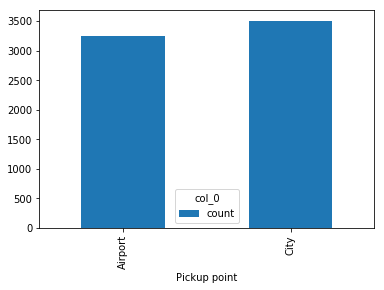

In [69]:
#univariate analysis on pickup point 
pickup_point = pd.crosstab(index = Uber["Pickup point"], columns = 'count')
pickup_point.plot.bar()

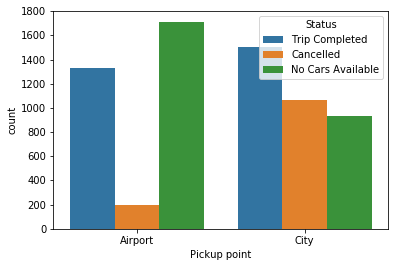

In [70]:
#visualizing the count of the pickuppoint and status
sns.countplot(x=Uber["Pickup point"], hue=Uber['Status'], data=Uber)

In [71]:
#Deriving new metrices
Uber['Request Hour'] = Uber['Request timestamp'].dt.hour

In [72]:
Uber['Request Time Slot'] = 'Early Morning'
Uber.loc[Uber['Request Hour'].between(5,8, inclusive=True),'Request Time Slot'] = 'Morning'
Uber.loc[Uber['Request Hour'].between(9,12, inclusive=True),'Request Time Slot'] = 'Late Morning'
Uber.loc[Uber['Request Hour'].between(13,16, inclusive=True),'Request Time Slot'] = 'Noon'
Uber.loc[Uber['Request Hour'].between(17,21, inclusive=True),'Request Time Slot'] = 'Evening'
Uber.loc[Uber['Request Hour'].between(21,24, inclusive=True),'Request Time Slot'] = 'Night'

In [38]:
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Time Slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


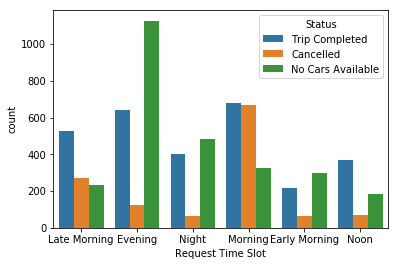

In [73]:
#Find the count of requests in different time slots
sns.countplot(x=Uber['Request Time Slot'], hue = Uber['Status'], data= Uber)

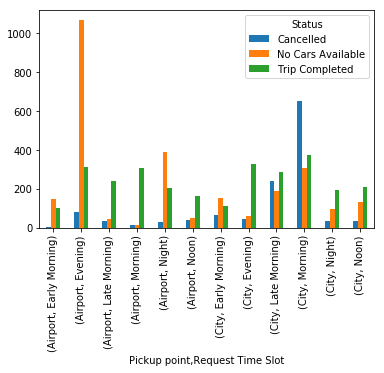

In [74]:
#PickUppoint W.r.t TimeSlots
pickup_df = pd.DataFrame(Uber.groupby(['Pickup point', 'Request Time Slot','Status'])['Request id'].count().unstack(fill_value=0))
pickup_df.plot.bar()

In [75]:
Uber['Drop Date'] = Uber['Drop timestamp'].dt.date
Uber['Drop Time'] = Uber['Drop timestamp'].dt.time

In [48]:
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Time Slot,Drop Date,Drop Time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning,2016-11-07,13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,2016-11-07,18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late Morning,2016-12-07,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,2016-12-07,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,2016-07-13,09:25:47


In [76]:
Uber['Request Date'] = Uber['Request timestamp'].dt.date
Uber['Request Time'] = Uber['Request timestamp'].dt.time

In [52]:
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Time Slot,Drop Date,Drop Time,Request Date,Request Time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning,2016-11-07,13:00:00,2016-11-07,11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,2016-11-07,18:47:00,2016-11-07,17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late Morning,2016-12-07,09:58:00,2016-12-07,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,2016-12-07,22:03:00,2016-12-07,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,2016-07-13,09:25:47,2016-07-13,08:33:16


In [82]:
Uber['days'] = Uber['Request Date'].apply(lambda x : dt.datetime.strftime(x,'%a'))

In [83]:
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Time Slot,Drop Date,Drop Time,Request Date,Request Time,days
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning,2016-11-07,13:00:00,2016-11-07,11:51:00,Mon
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,2016-11-07,18:47:00,2016-11-07,17:57:00,Mon
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late Morning,2016-12-07,09:58:00,2016-12-07,09:17:00,Wed
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,2016-12-07,22:03:00,2016-12-07,21:08:00,Wed
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,2016-07-13,09:25:47,2016-07-13,08:33:16,Wed


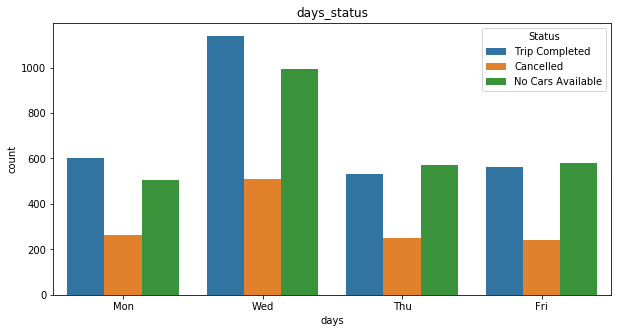

In [91]:
df = plt.subplots(figsize=(10,5))
plt.title('days_status')
df = sns.countplot(x='days', hue='Status',data=Uber)

In [86]:
Uber['hours'] = Uber['Request Time'].apply(lambda x:x.hour)

In [87]:
Uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Time Slot,Drop Date,Drop Time,Request Date,Request Time,days,hours
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning,2016-11-07,13:00:00,2016-11-07,11:51:00,Mon,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,2016-11-07,18:47:00,2016-11-07,17:57:00,Mon,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late Morning,2016-12-07,09:58:00,2016-12-07,09:17:00,Wed,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,2016-12-07,22:03:00,2016-12-07,21:08:00,Wed,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,2016-07-13,09:25:47,2016-07-13,08:33:16,Wed,8


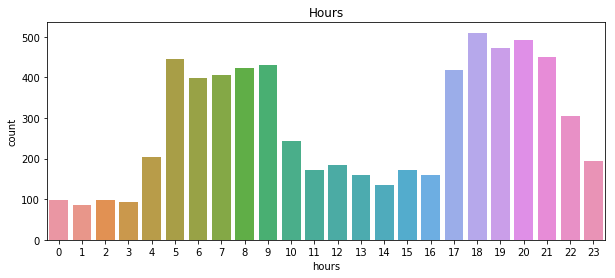

In [99]:
df1 = plt.subplots(figsize=(10,4))
plt.title('Hours')
df1 = sns.countplot(x='hours',data=Uber)

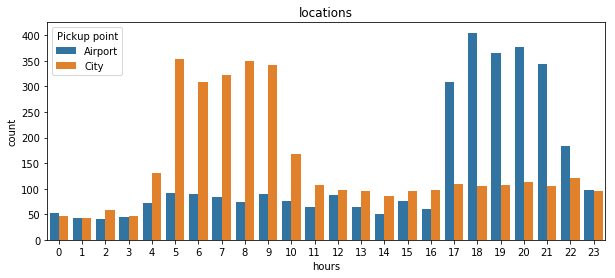

In [98]:
df2 = plt.subplots(figsize=(10,4))
plt.title('locations')
df2 = sns.countplot(x='hours',hue='Pickup point', data=Uber)

In [101]:
city=Uber[Uber['Pickup point']=='City']
airport=Uber[Uber['Pickup point']=='Airport']

In [102]:
city.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Time Slot,Drop Date,Drop Time,Request Date,Request Time,days,hours
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Late Morning,2016-12-07,09:58:00,2016-12-07,09:17:00,Wed,9
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,2016-07-13,09:25:47,2016-07-13,08:33:16,Wed,8
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,Evening,2016-07-15,18:50:51,2016-07-15,17:57:27,Fri,17
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,Morning,2016-11-07,07:25:00,2016-11-07,06:46:00,Mon,6
11,1983,City,2.0,Trip Completed,2016-12-07 12:30:00,2016-12-07 12:57:00,12,Late Morning,2016-12-07,12:57:00,2016-12-07,12:30:00,Wed,12


In [103]:
airport.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Time Slot,Drop Date,Drop Time,Request Date,Request Time,days,hours
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Late Morning,2016-11-07,13:00:00,2016-11-07,11:51:00,Mon,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,2016-11-07,18:47:00,2016-11-07,17:57:00,Mon,17
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,2016-12-07,22:03:00,2016-12-07,21:08:00,Wed,21
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,Night,2016-07-13,22:28:59,2016-07-13,21:57:28,Wed,21
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,Morning,2016-07-14,07:13:15,2016-07-14,06:15:32,Thu,6


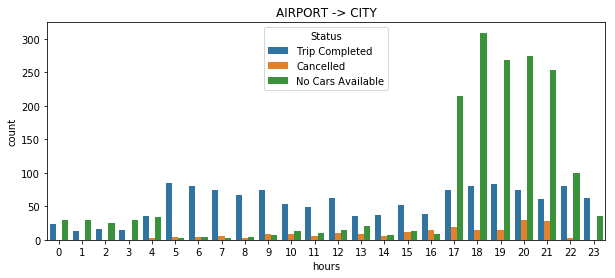

In [108]:
df4 = plt.subplots(figsize=(10,4))
plt.title('AIRPORT -> CITY')
df4 = sns.countplot(x='hours', hue='Status',data=airport)

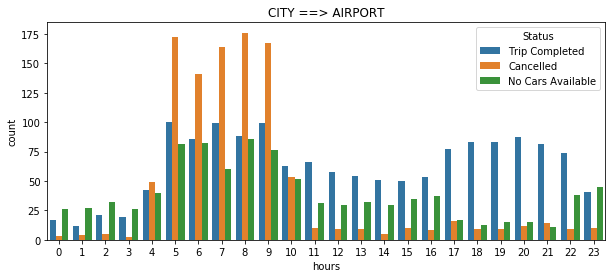

In [111]:
df5 = plt.subplots(figsize=(10,4))
plt.title('CITY ==> AIRPORT')
df5 = sns.countplot(x='hours', hue='Status',data=city)